In [ ]:
import numpy as np

In [27]:
np.random.seed(5)

순환신경망 : SimpleRNN, LSTM, GRU

LSTM(3, input_dim=1) == LSTM(출력 개수, 입력 차원)  
Dense(3, input_dim=1, input_length=4)  
input_length=4: 시퀀스 데이터의 입력 길이  
return_Sequences: 시퀀스 출력 여부  
-> True == many to many  
-> False == many to one  

새로 배우는 옵션  
- stateful : 상태 유지를 할 것인가?
- 마지막 상태의 값이 그다음 샘플의 초기값으로 입력된다 (True일 경우)  
- https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/


악보
- 음계(데이터) -> 코드화
- 음악은 시계열 데이터
- 도레미파솔라시
- 알파벳: 음계, 숫자:음의길이
- c(도), d(레), e(미), f(파), g(솔), a(라), b(시)
- 4(4분음표), 8(8분음표)

- g8 e8 e4
- 음표: 7*2 = 14가지
- 각 샘플은 4개 입력(음표), 클래스(음표)
- x1 x2 x3 x4   |     y
- 4 개 입력    |   출력(클래스)

In [43]:
# 1. 데이터 준비하기
        
# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [44]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset) 

In [45]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset) 

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


- 실제 음표 4개 입력 => 다음 음표 1개 출력되는 것을 반복
- 처음 4개 음표 입력 -> 곡 전체를 예측

In [46]:
# 실제 음표 4개 입력 => 다음 음표 1개 출력되는 것을 반복
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

In [47]:
x_train = x_train / float(max_idx_value) 

In [48]:
y_train

array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
        9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
        9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2])

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [50]:
y_train = np_utils.to_categorical(y_train) 

In [51]:
one_hot_vec_size = y_train.shape[1] 

In [52]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [53]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [54]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [55]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [56]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
5/5 - 0s - loss: 2.4524 - accuracy: 0.1800
Epoch 2/2000
5/5 - 0s - loss: 2.3501 - accuracy: 0.3400
Epoch 3/2000
5/5 - 0s - loss: 2.2714 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.1880 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.1163 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 2.0402 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 1.9927 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.9517 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.9278 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.9018 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.8825 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.8667 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.8525 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.8381 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.8261 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.8095 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.7970 - accuracy: 0.3400
Epoch 18/2000
5/5 - 0s - loss: 1.7835 - 

In [57]:
# history.losses # 손실 이력 클래스의 이력을 확인할 수 있음

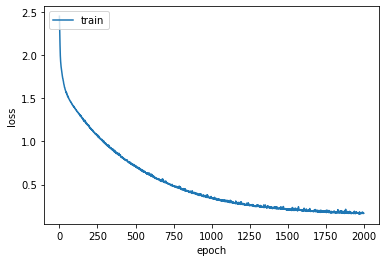

In [58]:
# 6. 학습과정 살펴보기
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [59]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9200
accuracy: 92.00%


In [60]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

In [61]:
# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [62]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환
# 입력 코드 -> 인덱스 -> 정규화

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)
# 결과가 한번 틀리면 계속 틀리는 경우

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [63]:
# 입력 코드 -> 인덱스 -> 정규화
seq_in

[0.6153846153846154,
 0.6153846153846154,
 0.6153846153846154,
 0.6153846153846154]

# stateful = True 옵션을 설정한 전체 코드

(50, 5)
one hot encoding vector size is  12
epochs : 0
50/50 - 0s - loss: 2.3499 - accuracy: 0.1800
epochs : 1
50/50 - 0s - loss: 2.0213 - accuracy: 0.3600
epochs : 2
50/50 - 0s - loss: 1.9634 - accuracy: 0.3600
epochs : 3
50/50 - 0s - loss: 1.9466 - accuracy: 0.3600
epochs : 4
50/50 - 0s - loss: 1.9366 - accuracy: 0.3600
epochs : 5
50/50 - 0s - loss: 1.9294 - accuracy: 0.3600
epochs : 6
50/50 - 0s - loss: 1.9238 - accuracy: 0.3600
epochs : 7
50/50 - 0s - loss: 1.9191 - accuracy: 0.3600
epochs : 8
50/50 - 0s - loss: 1.9150 - accuracy: 0.3600
epochs : 9
50/50 - 0s - loss: 1.9112 - accuracy: 0.3600
epochs : 10
50/50 - 0s - loss: 1.9075 - accuracy: 0.3600
epochs : 11
50/50 - 0s - loss: 1.9036 - accuracy: 0.3600
epochs : 12
50/50 - 0s - loss: 1.8993 - accuracy: 0.3600
epochs : 13
50/50 - 0s - loss: 1.8945 - accuracy: 0.3600
epochs : 14
50/50 - 0s - loss: 1.9108 - accuracy: 0.3600
epochs : 15
50/50 - 0s - loss: 1.8978 - accuracy: 0.3600
epochs : 16
50/50 - 0s - loss: 1.8877 - accuracy: 0.36

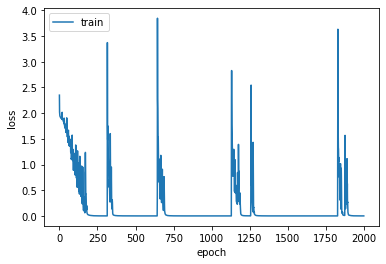

50/50 [==============================] - 0s 2ms/step - loss: 1.8662e-04 - accuracy: 1.0000
accuracy: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [41]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True)) #뒤에 있는 출력이 사용되도록 하였다
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states() # 모델에 있는 모든 상태값을 초기화
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)